In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib as plt
from torch.utils.data import DataLoader
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler
import csv

%run '/kaggle/input/cte-dataloader/CTE.ipynb'
%run '/kaggle/input/cte-dataloader/dataloader.ipynb'


import numpy as np
import os

torch.Size([1, 105])


In [2]:
class LabelSomCE(nn.Module):
	def __init__(self):
		super().__init__()

	def forward(self,x,target,smoothing=0.1):
		confidence = 1.0 - smoothing
		logprobs = F.log_softmax(x,dim=-1)
		nll_loss = - logprobs.gather(dim=-1,index=target.unsqueeze(1))
		nll_loss = nll_loss.squeeze(1)
		smooth_loss = -logprobs.mean(dim=-1)
		loss = confidence * nll_loss + smoothing * smooth_loss

		return loss.mean()

def download(folder,thetarfile):
    import urllib.request
    import tarfile
    ftpstream = urllib.request.urlopen(thetarfile)
    thetarfile = tarfile.open(fileobj=ftpstream, mode="r|gz")
    thetarfile.extractall(folder)
    thetarfile.close()

def download_cerug(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/CERUG-EN-test-images.tar.gz"
    download(folder,thetarfile)

def download_firemaker(folder):
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-train-images.tar.gz"
    download(folder,thetarfile)
    thetarfile = "https://www.ai.rug.nl/~sheng/writerset/Firemaker-test-images.tar.gz"
    download(folder,thetarfile)


wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/iam-words-v2/IAM_words_segments with images: 80422
number of writer is: 657
-*-*-*-*-*-*-*-*-*-*
wsegs_writer_index_table.pickle
----------
loading dataset /kaggle/input/iam-words-v2/IAM_words_segments with images: 23661
number of writer is: 657
-*-*-*-*-*-*-*-*-*-*
Traing epoch: 0   avg loss is: 6.619221750929969
Testing epoch: 0   avg testing loss is: 4.1261635835788155
Testing on epoch: 0 has accuracy: top1: 29.68 top5: 52.60


/tmp/ipykernel_23/1529481157.py:131: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
/tmp/ipykernel_23/1529481157.py:133: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))


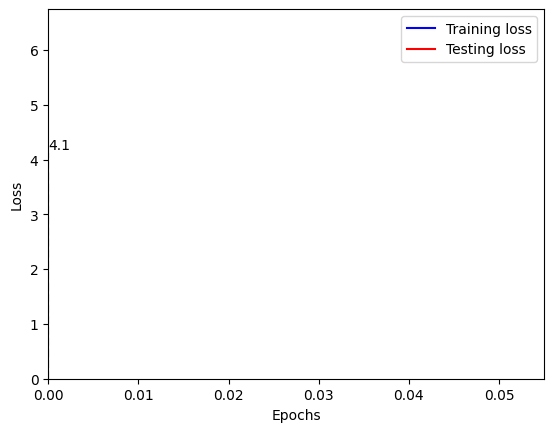

Traing epoch: 1   avg loss is: 3.838895808592575
Testing epoch: 1   avg testing loss is: 3.3405551676656686
Testing on epoch: 1 has accuracy: top1: 45.51 top5: 70.01


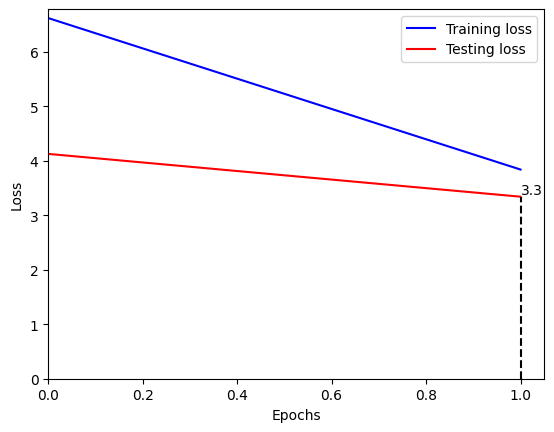

Traing epoch: 2   avg loss is: 3.1924089063366616
Testing epoch: 2   avg testing loss is: 2.9766899337633146
Testing on epoch: 2 has accuracy: top1: 56.02 top5: 77.95


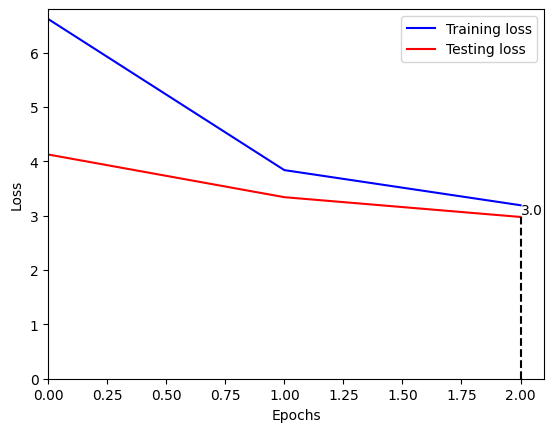

Traing epoch: 3   avg loss is: 2.841328626792838
Testing epoch: 3   avg testing loss is: 2.6622820051237084
Testing on epoch: 3 has accuracy: top1: 63.14 top5: 83.34


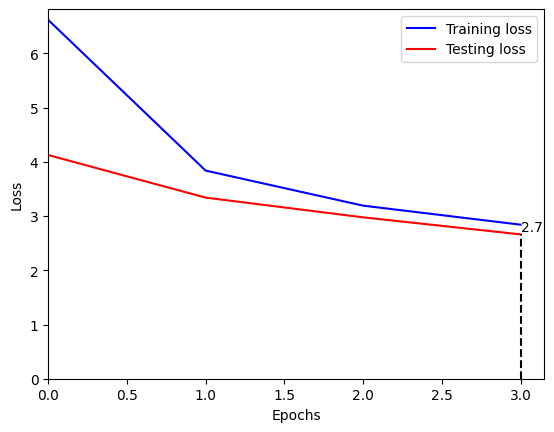

Traing epoch: 4   avg loss is: 2.5997788030883964
Testing epoch: 4   avg testing loss is: 2.4333882387463026
Testing on epoch: 4 has accuracy: top1: 69.93 top5: 86.48


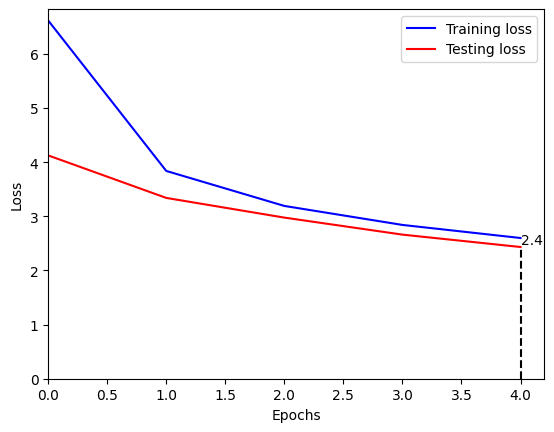

Traing epoch: 5   avg loss is: 2.4289937863015956
Testing epoch: 5   avg testing loss is: 2.3643870386745256
Testing on epoch: 5 has accuracy: top1: 71.48 top5: 87.26


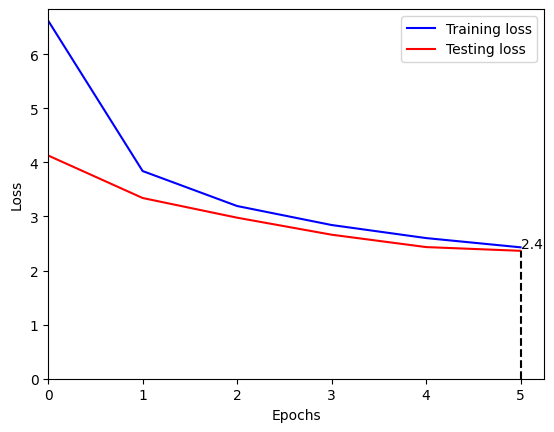

Traing epoch: 6   avg loss is: 2.28982969920473
Testing epoch: 6   avg testing loss is: 2.404743037971796
Testing on epoch: 6 has accuracy: top1: 70.44 top5: 86.98


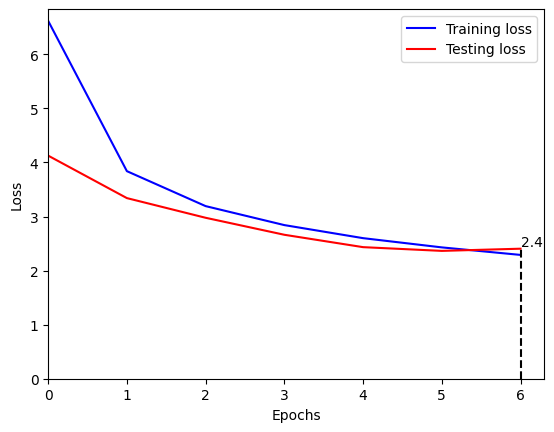

Traing epoch: 7   avg loss is: 2.1827368167496943
Testing epoch: 7   avg testing loss is: 2.226339535909863
Testing on epoch: 7 has accuracy: top1: 74.61 top5: 88.94


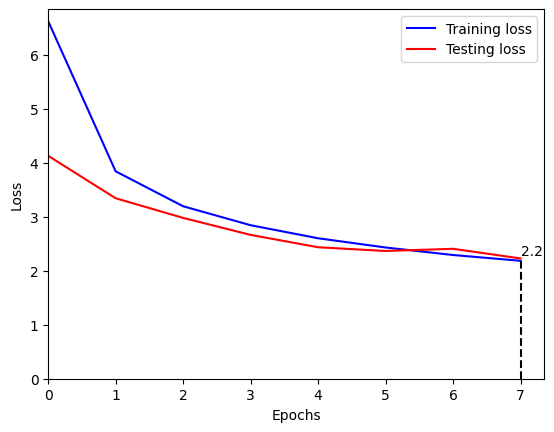

Traing epoch: 8   avg loss is: 2.0911955920482033
Testing epoch: 8   avg testing loss is: 2.134937284684326
Testing on epoch: 8 has accuracy: top1: 77.44 top5: 90.01


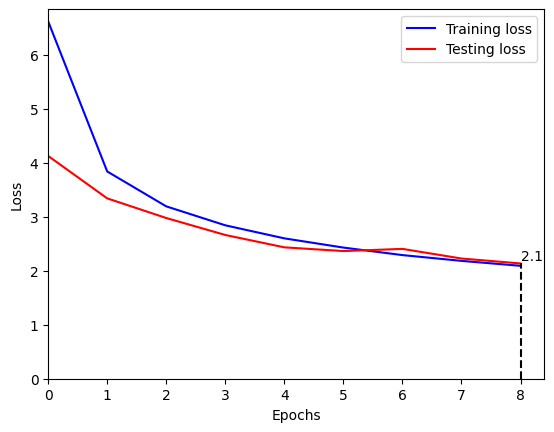

Traing epoch: 9   avg loss is: 2.0130257196650296
Testing epoch: 9   avg testing loss is: 2.110490300511895
Testing on epoch: 9 has accuracy: top1: 77.76 top5: 90.45


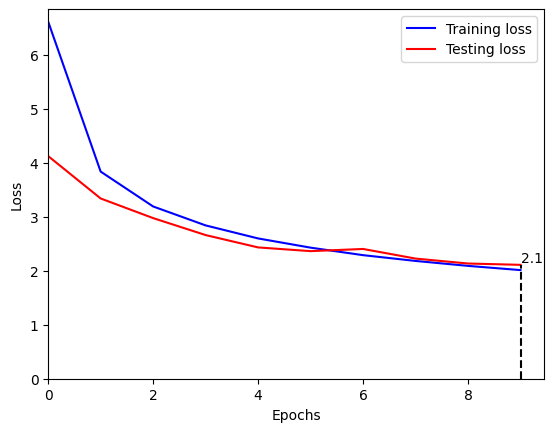

Traing epoch: 10   avg loss is: 1.7972137103316037
Testing epoch: 10   avg testing loss is: 1.8982587089564367
Testing on epoch: 10 has accuracy: top1: 83.13 top5: 92.38


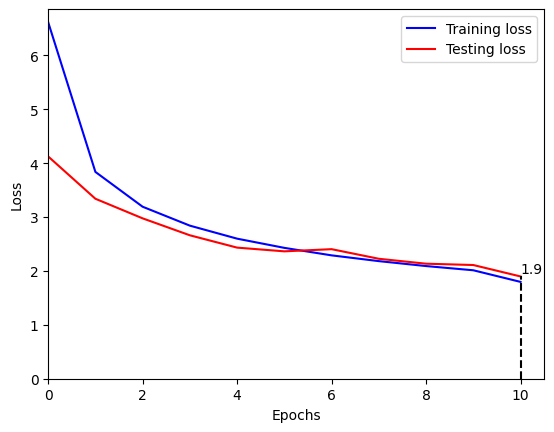

Traing epoch: 11   avg loss is: 1.7408919598398767
Testing epoch: 11   avg testing loss is: 1.8820815068632466
Testing on epoch: 11 has accuracy: top1: 83.43 top5: 92.52


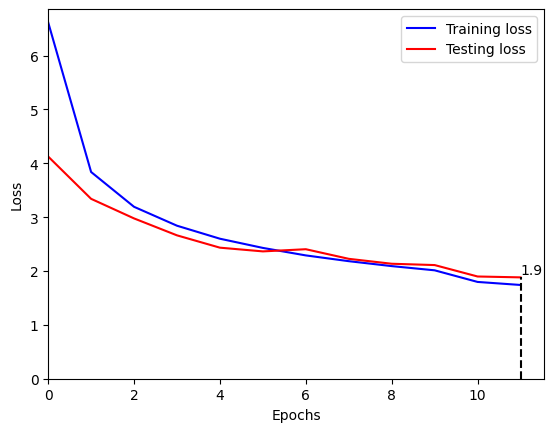

Traing epoch: 12   avg loss is: 1.6996651186062623
Testing epoch: 12   avg testing loss is: 1.8703768718395788
Testing on epoch: 12 has accuracy: top1: 83.71 top5: 92.59


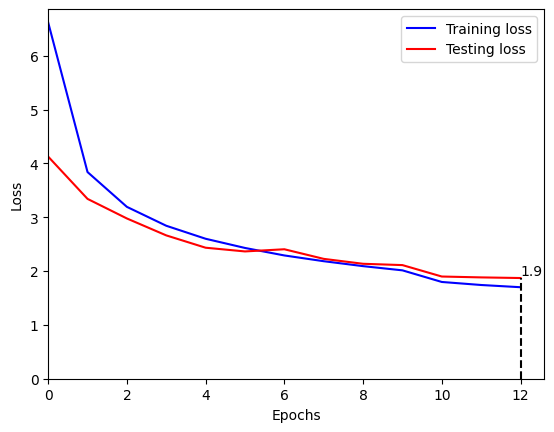

Traing epoch: 13   avg loss is: 1.6631897209509408
Testing epoch: 13   avg testing loss is: 1.8325138104131207
Testing on epoch: 13 has accuracy: top1: 84.59 top5: 92.89


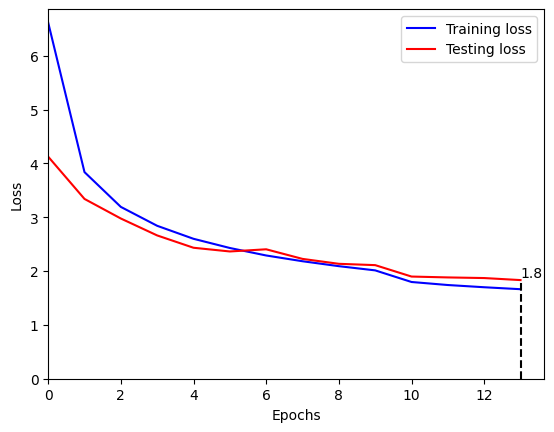

Traing epoch: 14   avg loss is: 1.6266672949225505
Testing epoch: 14   avg testing loss is: 1.8500353831387275
Testing on epoch: 14 has accuracy: top1: 83.94 top5: 92.62


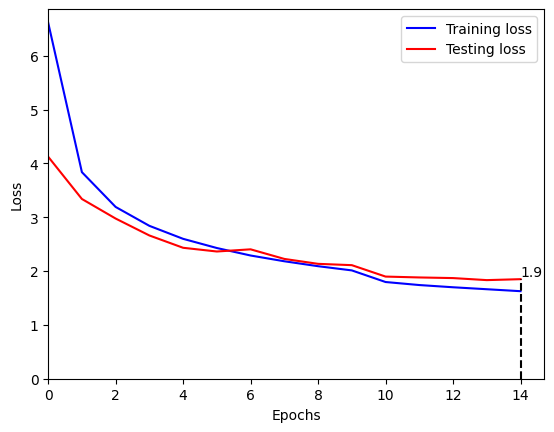

Traing epoch: 15   avg loss is: 1.597962153204589
Testing epoch: 15   avg testing loss is: 1.8115251252907527
Testing on epoch: 15 has accuracy: top1: 85.09 top5: 93.18


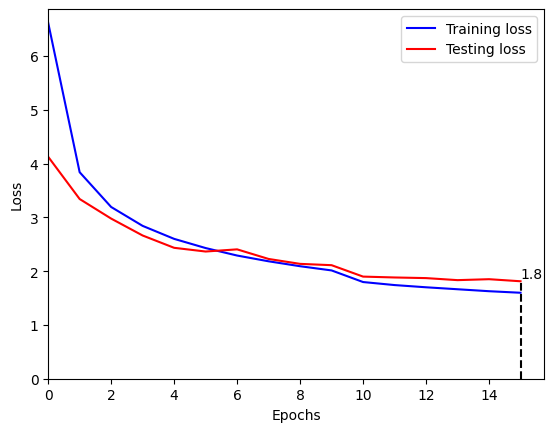

Traing epoch: 16   avg loss is: 1.5665651375062428
Testing epoch: 16   avg testing loss is: 1.785414650683632
Testing on epoch: 16 has accuracy: top1: 85.38 top5: 93.22


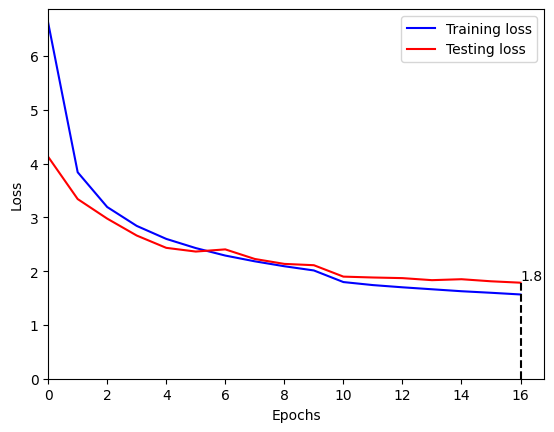

Traing epoch: 17   avg loss is: 1.5426121582275265
Testing epoch: 17   avg testing loss is: 1.8212011710786593
Testing on epoch: 17 has accuracy: top1: 84.81 top5: 92.97


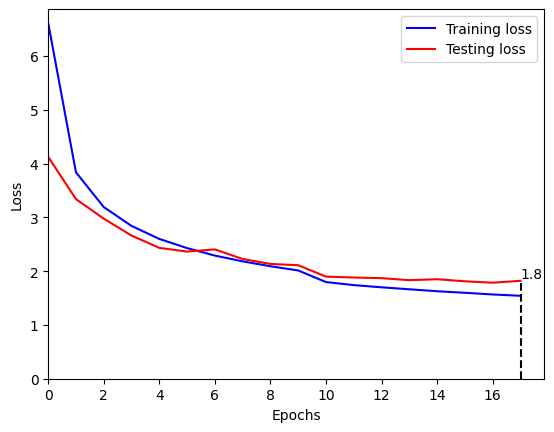

Traing epoch: 18   avg loss is: 1.515515970012082
Testing epoch: 18   avg testing loss is: 1.7881069949061748
Testing on epoch: 18 has accuracy: top1: 85.36 top5: 93.15


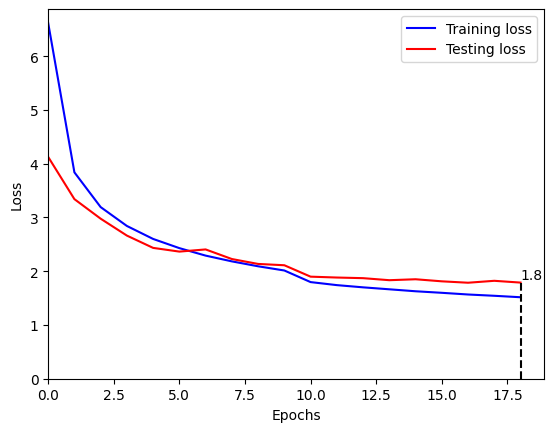

Traing epoch: 19   avg loss is: 1.487032155614899
Testing epoch: 19   avg testing loss is: 1.7745153434861747
Testing on epoch: 19 has accuracy: top1: 85.55 top5: 93.20


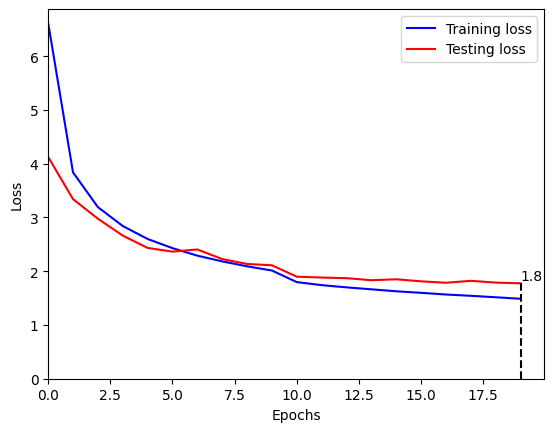

Traing epoch: 20   avg loss is: 1.3841246880006848
Testing epoch: 20   avg testing loss is: 1.7160702222420445
Testing on epoch: 20 has accuracy: top1: 87.08 top5: 93.84


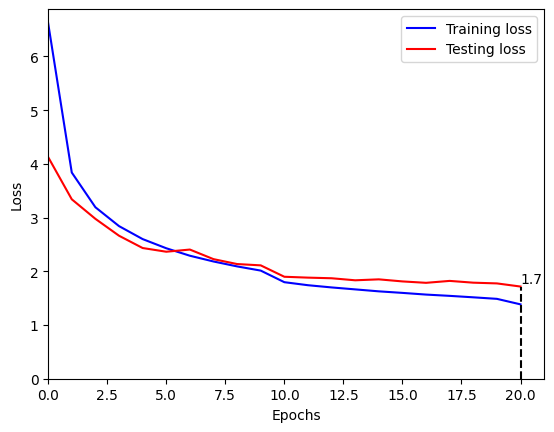

Traing epoch: 21   avg loss is: 1.3558124311407675
Testing epoch: 21   avg testing loss is: 1.7115793063722808
Testing on epoch: 21 has accuracy: top1: 87.27 top5: 93.71


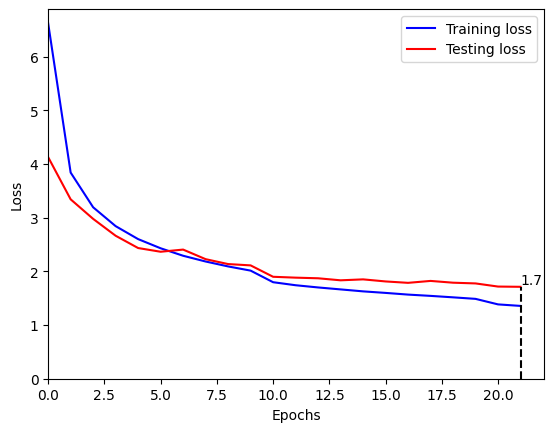

Traing epoch: 22   avg loss is: 1.3369671788245996
Testing epoch: 22   avg testing loss is: 1.7271134003825572
Testing on epoch: 22 has accuracy: top1: 86.81 top5: 93.66


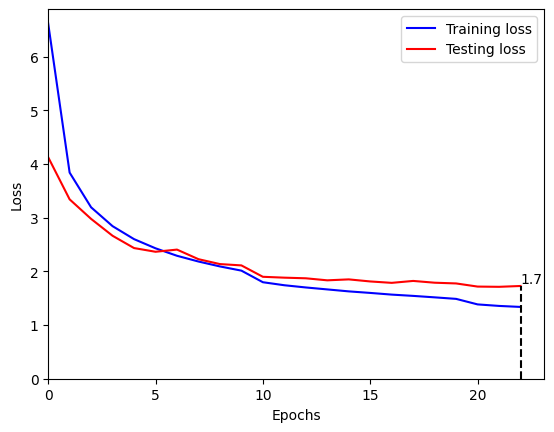

Traing epoch: 23   avg loss is: 1.3194836240530108
Testing epoch: 23   avg testing loss is: 1.7277161982351255
Testing on epoch: 23 has accuracy: top1: 86.85 top5: 93.55


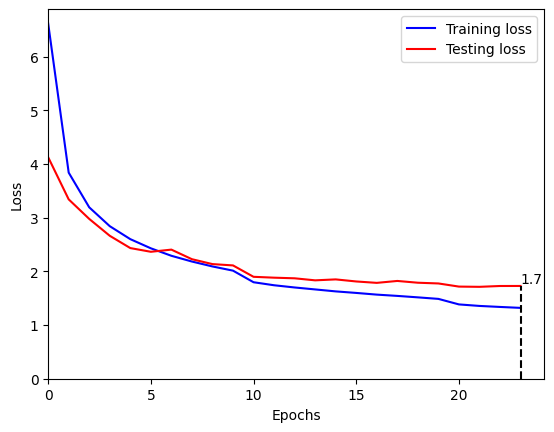

Traing epoch: 24   avg loss is: 1.304126553098092
Testing epoch: 24   avg testing loss is: 1.715641320356249
Testing on epoch: 24 has accuracy: top1: 87.22 top5: 93.56


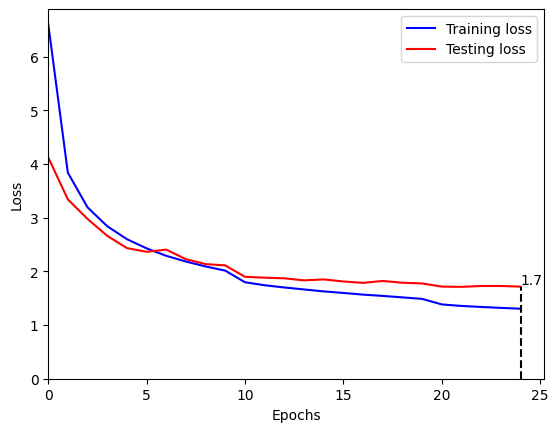

Traing epoch: 25   avg loss is: 1.2903138614962693
Testing epoch: 25   avg testing loss is: 1.7291847362640824
Testing on epoch: 25 has accuracy: top1: 87.10 top5: 93.58


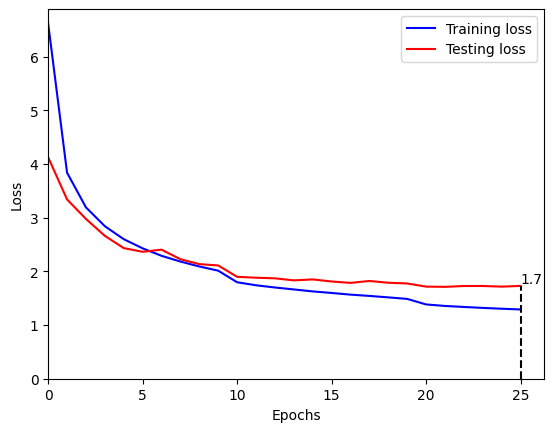

Traing epoch: 26   avg loss is: 1.2783563394400403
Testing epoch: 26   avg testing loss is: 1.7208043475502484
Testing on epoch: 26 has accuracy: top1: 87.16 top5: 93.50


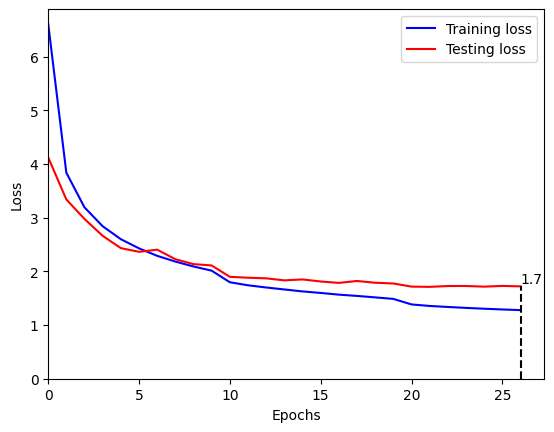

Traing epoch: 27   avg loss is: 1.266465500797639
Testing epoch: 27   avg testing loss is: 1.740718738624903
Testing on epoch: 27 has accuracy: top1: 86.83 top5: 93.35


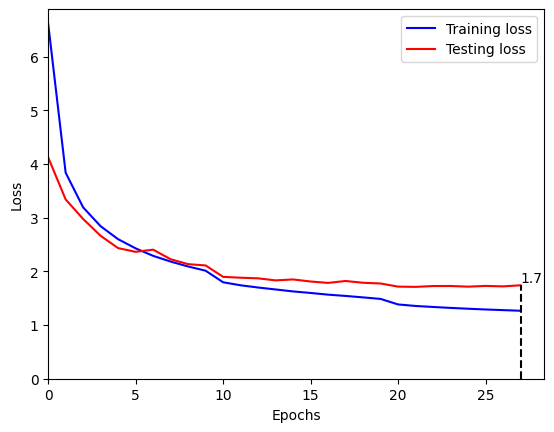

Traing epoch: 28   avg loss is: 1.25349110058945
Testing epoch: 28   avg testing loss is: 1.719209533434127
Testing on epoch: 28 has accuracy: top1: 87.09 top5: 93.50


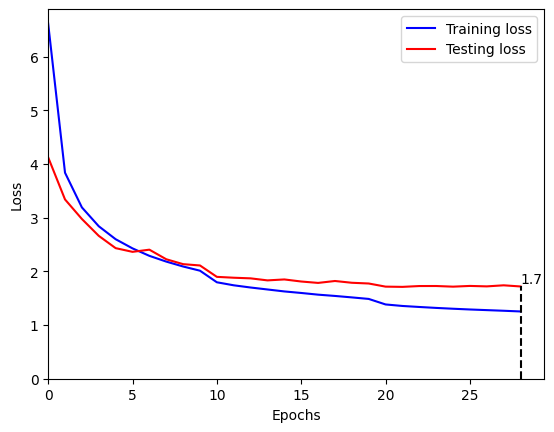

Traing epoch: 29   avg loss is: 1.2426659186143492
Testing epoch: 29   avg testing loss is: 1.7281397876907152
Testing on epoch: 29 has accuracy: top1: 87.22 top5: 93.60


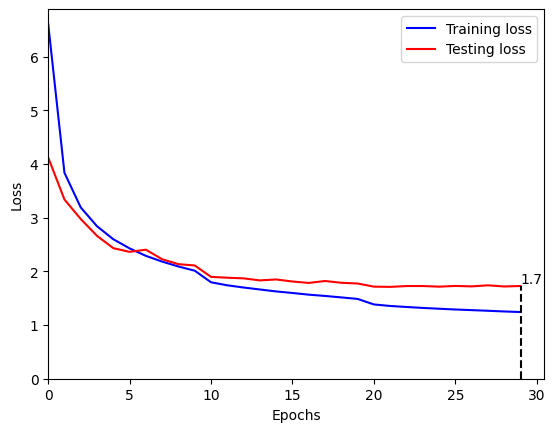

Traing epoch: 30   avg loss is: 1.1991779811108108
Testing epoch: 30   avg testing loss is: 1.7043137676091997
Testing on epoch: 30 has accuracy: top1: 87.61 top5: 93.70


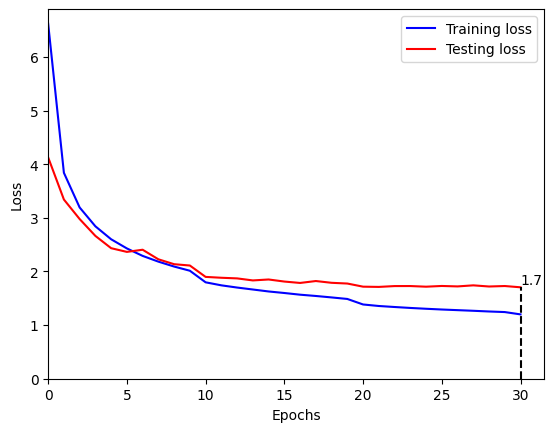

Traing epoch: 31   avg loss is: 1.188836071105104
Testing epoch: 31   avg testing loss is: 1.7006596473522329
Testing on epoch: 31 has accuracy: top1: 87.82 top5: 93.67


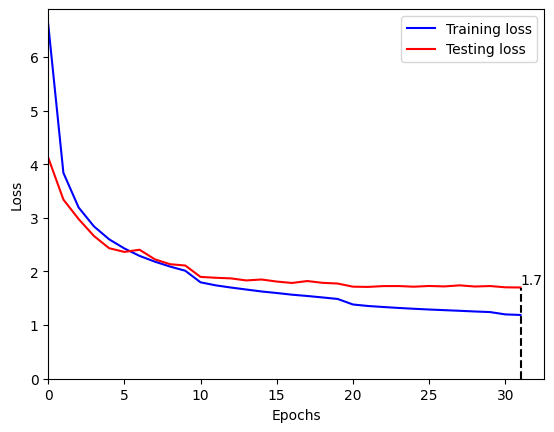

Traing epoch: 32   avg loss is: 1.1806295537825273
Testing epoch: 32   avg testing loss is: 1.6934416971954644
Testing on epoch: 32 has accuracy: top1: 87.68 top5: 93.68


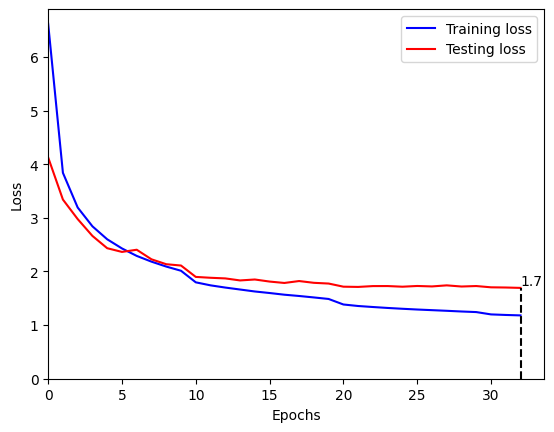

Traing epoch: 33   avg loss is: 1.17604473649483
Testing epoch: 33   avg testing loss is: 1.697595442526239
Testing on epoch: 33 has accuracy: top1: 87.74 top5: 93.58


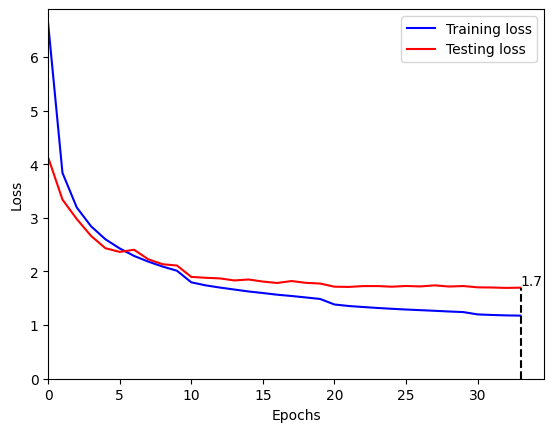

Traing epoch: 34   avg loss is: 1.1702983482065212
Testing epoch: 34   avg testing loss is: 1.7057755518153037
Testing on epoch: 34 has accuracy: top1: 87.64 top5: 93.55


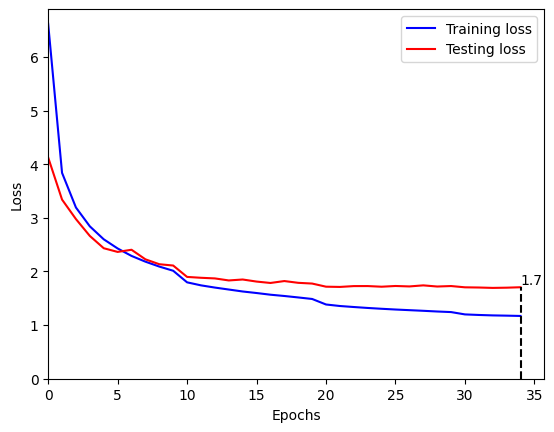

Traing epoch: 35   avg loss is: 1.1658184755099896
Testing epoch: 35   avg testing loss is: 1.705937691279728
Testing on epoch: 35 has accuracy: top1: 87.71 top5: 93.56


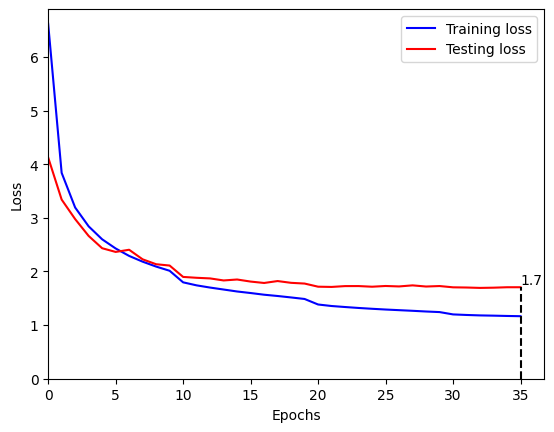

Traing epoch: 36   avg loss is: 1.1612237197348096
Testing epoch: 36   avg testing loss is: 1.6944934577858068
Testing on epoch: 36 has accuracy: top1: 87.74 top5: 93.63


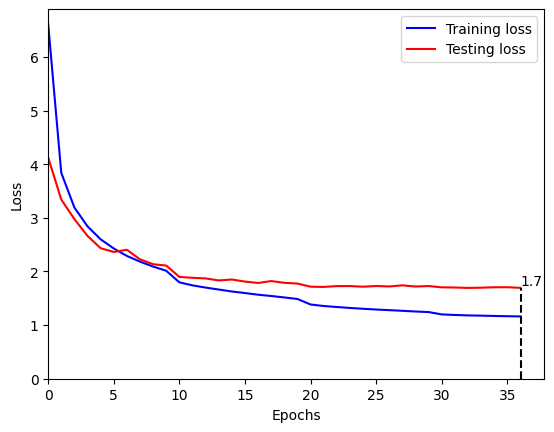

Traing epoch: 37   avg loss is: 1.158004594736255
Testing epoch: 37   avg testing loss is: 1.692501805294519
Testing on epoch: 37 has accuracy: top1: 87.88 top5: 93.62


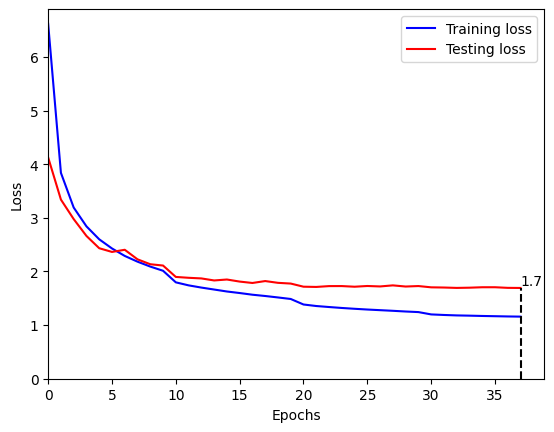

Traing epoch: 38   avg loss is: 1.1535928518801537
Testing epoch: 38   avg testing loss is: 1.6893534524123197
Testing on epoch: 38 has accuracy: top1: 87.77 top5: 93.61


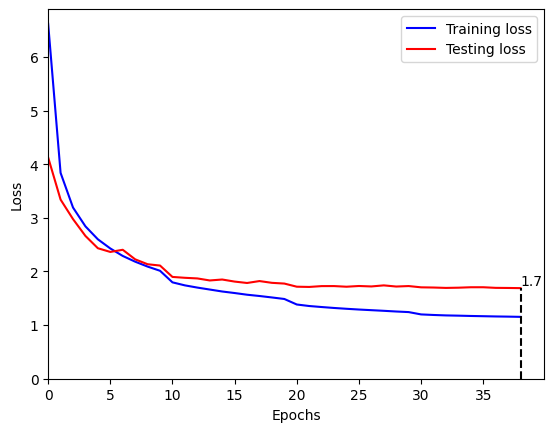

Traing epoch: 39   avg loss is: 1.1499729537176413
Testing epoch: 39   avg testing loss is: 1.6915589651600422
Testing on epoch: 39 has accuracy: top1: 87.90 top5: 93.52


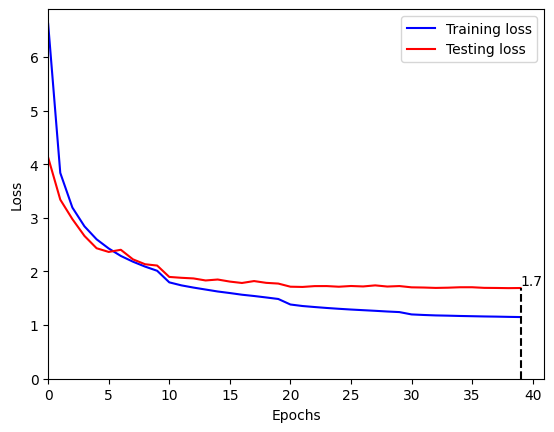

Traing epoch: 40   avg loss is: 1.134718438187207
Testing epoch: 40   avg testing loss is: 1.6777914116074701
Testing on epoch: 40 has accuracy: top1: 87.89 top5: 93.69


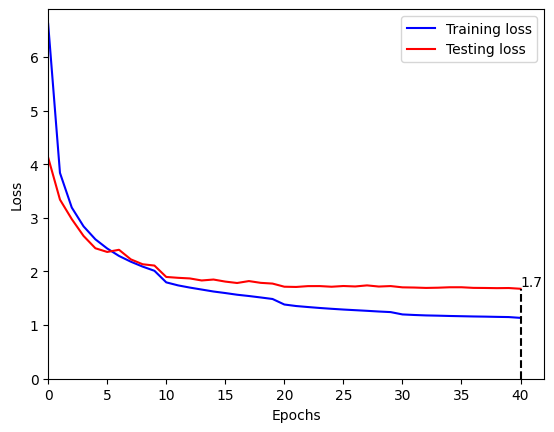

Traing epoch: 41   avg loss is: 1.1308521684829904
Testing epoch: 41   avg testing loss is: 1.6740958314235344
Testing on epoch: 41 has accuracy: top1: 87.95 top5: 93.66


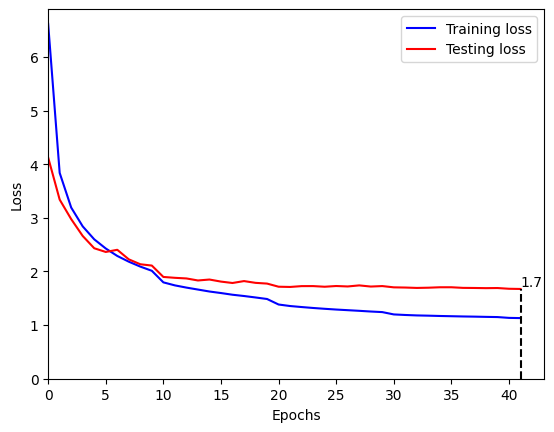

Traing epoch: 42   avg loss is: 1.1295436334904094
Testing epoch: 42   avg testing loss is: 1.6712364396829715
Testing on epoch: 42 has accuracy: top1: 88.02 top5: 93.64


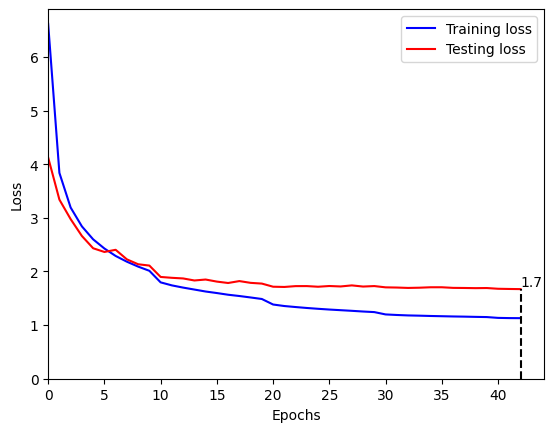

Traing epoch: 43   avg loss is: 1.126763558250189
Testing epoch: 43   avg testing loss is: 1.6732604748659476
Testing on epoch: 43 has accuracy: top1: 87.85 top5: 93.60


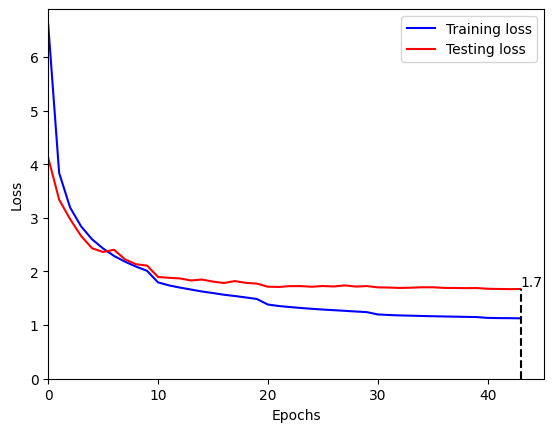

Traing epoch: 44   avg loss is: 1.1248763405228344
Testing epoch: 44   avg testing loss is: 1.670928981757148
Testing on epoch: 44 has accuracy: top1: 87.98 top5: 93.55


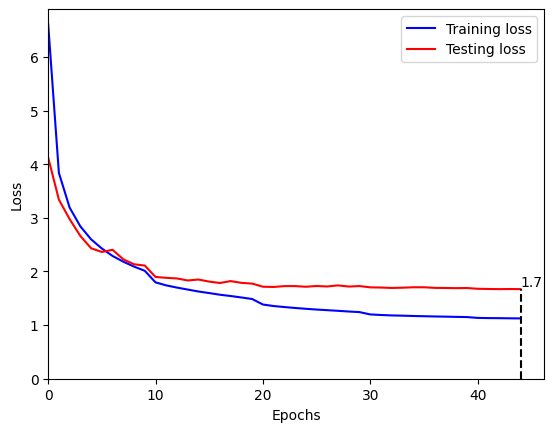

Traing epoch: 45   avg loss is: 1.122626401350596
Testing epoch: 45   avg testing loss is: 1.6747149554678844
Testing on epoch: 45 has accuracy: top1: 87.99 top5: 93.57


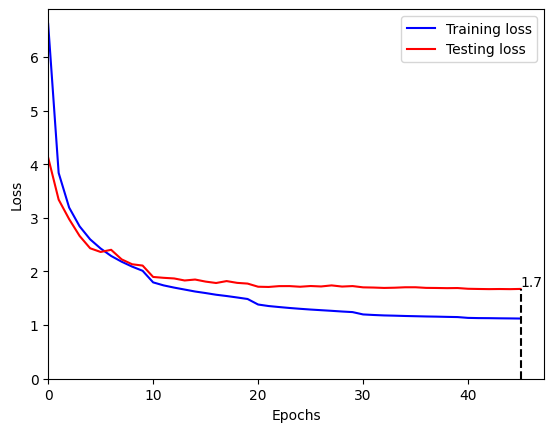

Traing epoch: 46   avg loss is: 1.12157044714777
Testing epoch: 46   avg testing loss is: 1.668027488342244
Testing on epoch: 46 has accuracy: top1: 87.87 top5: 93.69


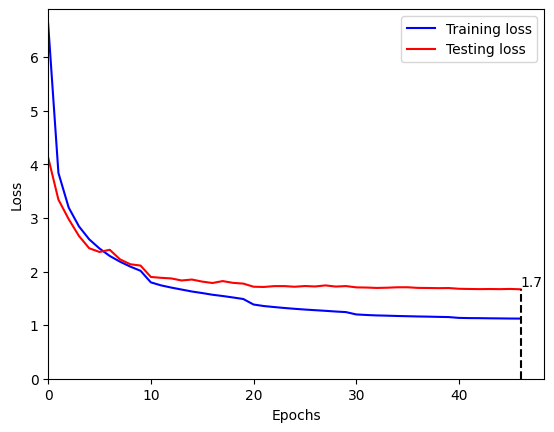

Traing epoch: 47   avg loss is: 1.1203846472504126
Testing epoch: 47   avg testing loss is: 1.6702815648105356
Testing on epoch: 47 has accuracy: top1: 87.95 top5: 93.58


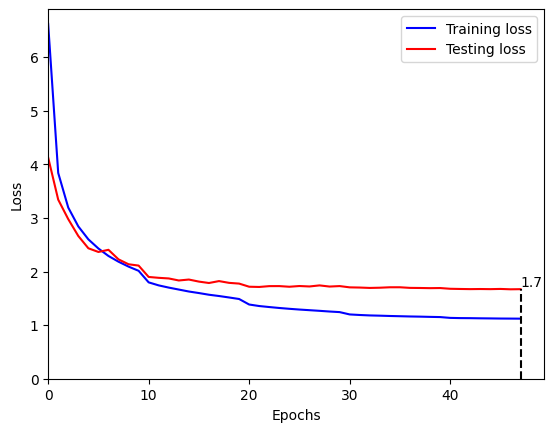

Traing epoch: 48   avg loss is: 1.1182762031720257
Testing epoch: 48   avg testing loss is: 1.668705476789236
Testing on epoch: 48 has accuracy: top1: 88.01 top5: 93.57


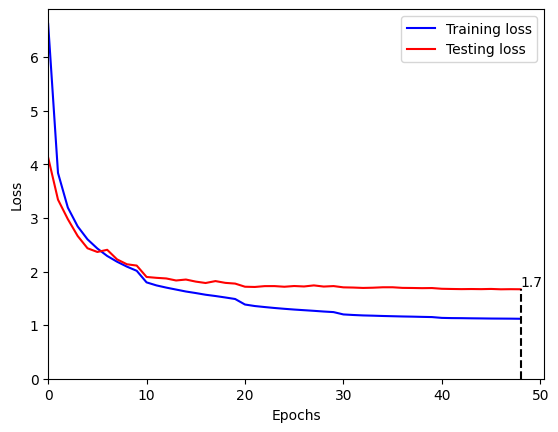

Traing epoch: 49   avg loss is: 1.116775428589435
Testing epoch: 49   avg testing loss is: 1.666457744447503
Testing on epoch: 49 has accuracy: top1: 87.99 top5: 93.56


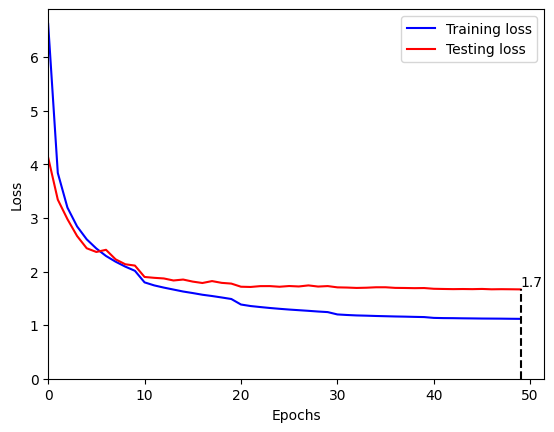

Traing epoch: 50   avg loss is: 1.1104258678607433
Testing epoch: 50   avg testing loss is: 1.661506949847739
Testing on epoch: 50 has accuracy: top1: 87.96 top5: 93.57


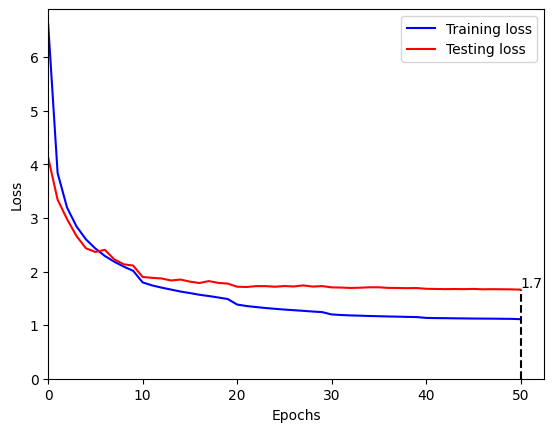

Traing epoch: 51   avg loss is: 1.1087571975248438
Testing epoch: 51   avg testing loss is: 1.6616163214289554
Testing on epoch: 51 has accuracy: top1: 88.15 top5: 93.59


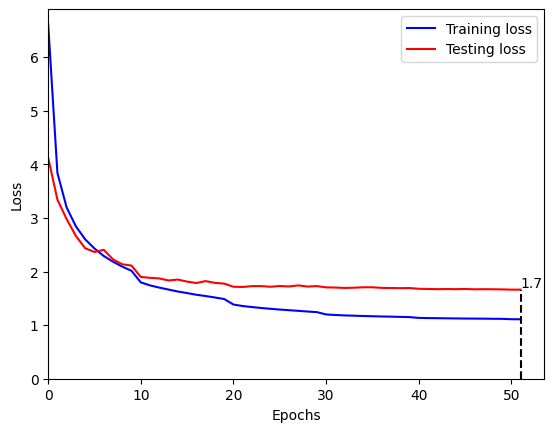

Traing epoch: 52   avg loss is: 1.1081076647672718
Testing epoch: 52   avg testing loss is: 1.6579818006622542
Testing on epoch: 52 has accuracy: top1: 88.04 top5: 93.58


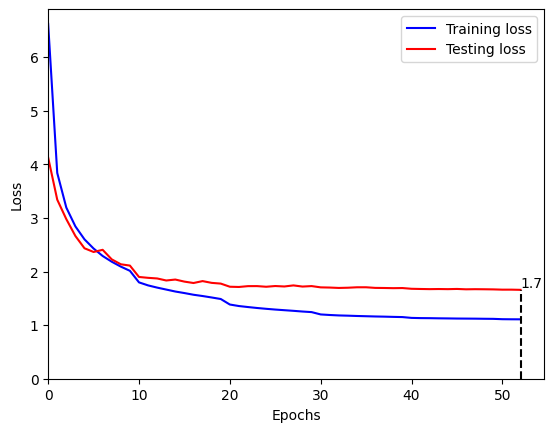

Traing epoch: 53   avg loss is: 1.107220513337739
Testing epoch: 53   avg testing loss is: 1.6598379794933895
Testing on epoch: 53 has accuracy: top1: 88.00 top5: 93.63


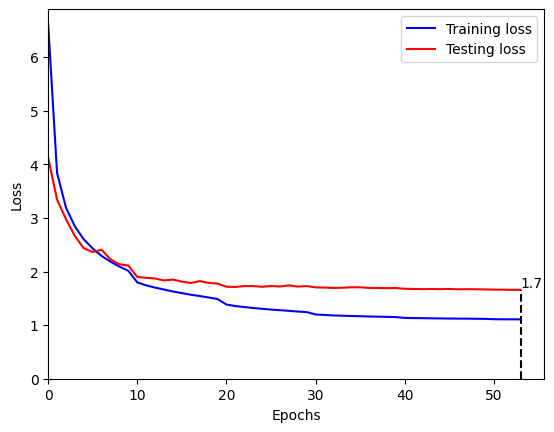

Traing epoch: 54   avg loss is: 1.1060482130741343
Testing epoch: 54   avg testing loss is: 1.660226449924518
Testing on epoch: 54 has accuracy: top1: 88.07 top5: 93.61


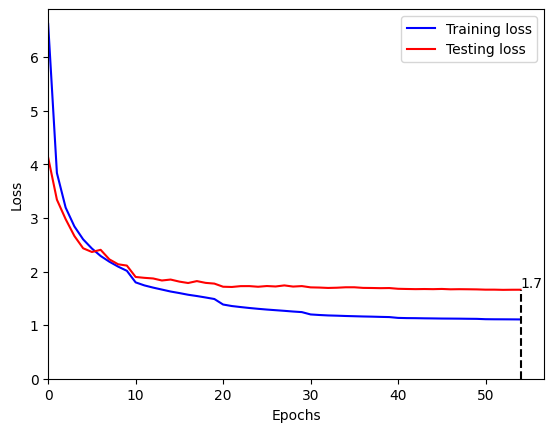

Traing epoch: 55   avg loss is: 1.1057272463787897
Testing epoch: 55   avg testing loss is: 1.6566853441041092
Testing on epoch: 55 has accuracy: top1: 88.16 top5: 93.58


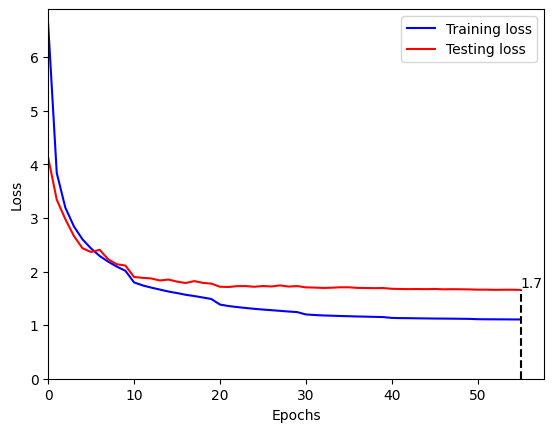

Traing epoch: 56   avg loss is: 1.1048969312630657
Testing epoch: 56   avg testing loss is: 1.6595953008949635
Testing on epoch: 56 has accuracy: top1: 88.00 top5: 93.54


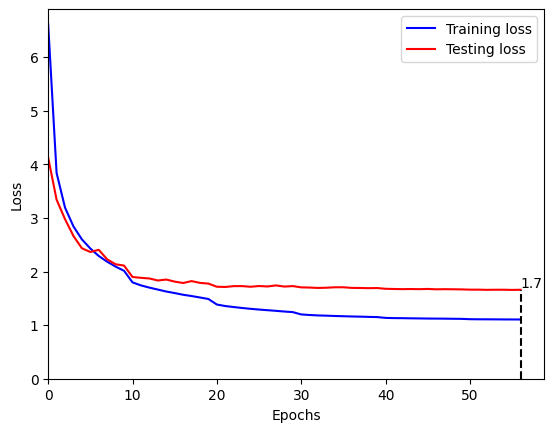

Traing epoch: 57   avg loss is: 1.103970514058213
Testing epoch: 57   avg testing loss is: 1.6579489141319796
Testing on epoch: 57 has accuracy: top1: 87.93 top5: 93.60


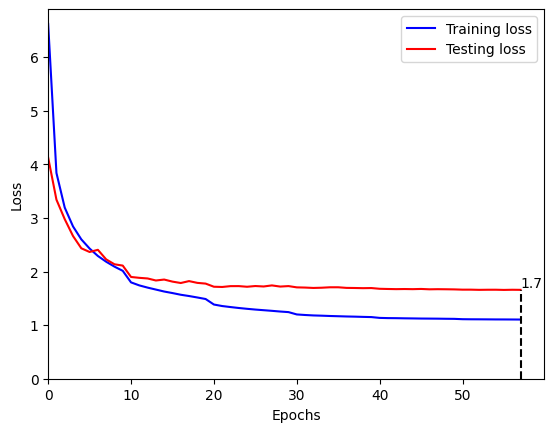

Traing epoch: 58   avg loss is: 1.1031622619824346
Testing epoch: 58   avg testing loss is: 1.6581025275932606
Testing on epoch: 58 has accuracy: top1: 87.99 top5: 93.55


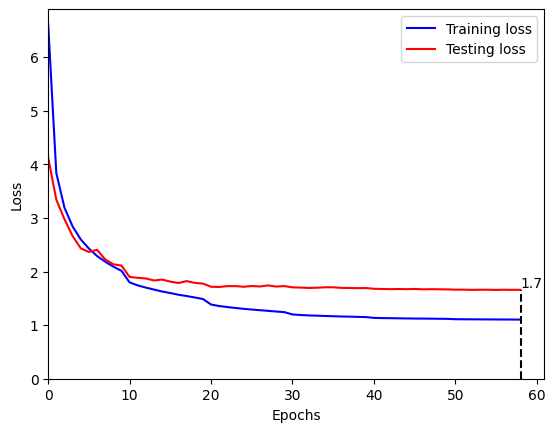

Traing epoch: 59   avg loss is: 1.102247606555257
Testing epoch: 59   avg testing loss is: 1.661735928808216
Testing on epoch: 59 has accuracy: top1: 88.08 top5: 93.58


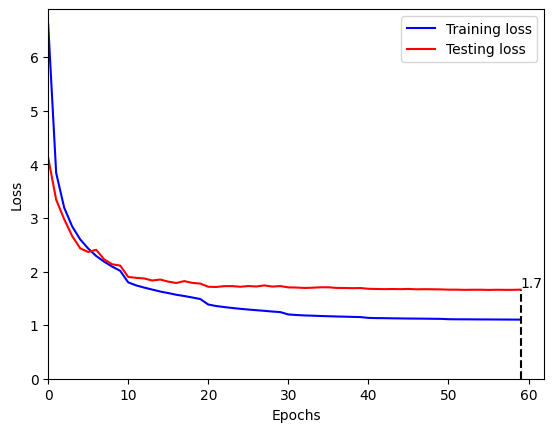

Traing epoch: 60   avg loss is: 1.0998957541137875
Testing epoch: 60   avg testing loss is: 1.6632462980942277
Testing on epoch: 60 has accuracy: top1: 88.10 top5: 93.53


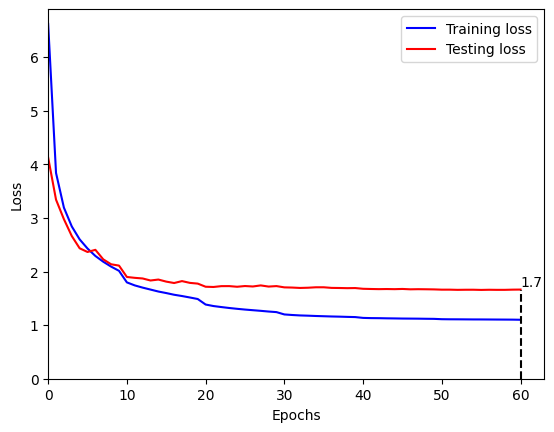

Traing epoch: 61   avg loss is: 1.0993133293552984
Testing epoch: 61   avg testing loss is: 1.6545752701201577
Testing on epoch: 61 has accuracy: top1: 88.13 top5: 93.57


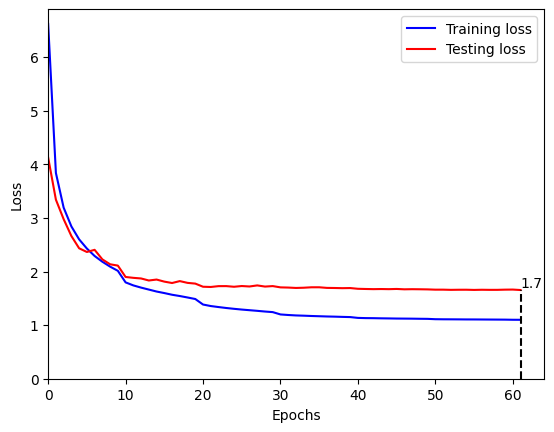

Traing epoch: 62   avg loss is: 1.0981359676066216
Testing epoch: 62   avg testing loss is: 1.6560162246992975
Testing on epoch: 62 has accuracy: top1: 88.08 top5: 93.54


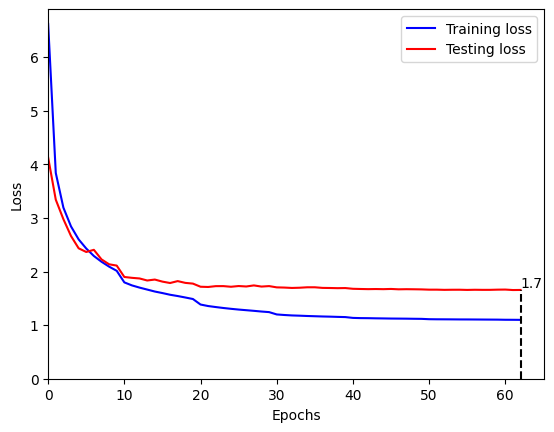

Traing epoch: 63   avg loss is: 1.0978589040607842
Testing epoch: 63   avg testing loss is: 1.6587013174666998
Testing on epoch: 63 has accuracy: top1: 88.05 top5: 93.55


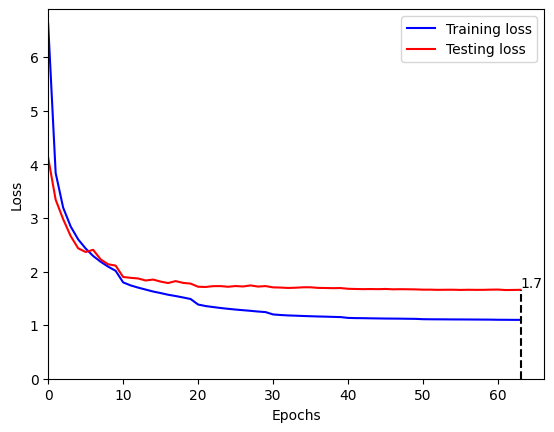

Traing epoch: 64   avg loss is: 1.0977179771915546
Testing epoch: 64   avg testing loss is: 1.654062303600479
Testing on epoch: 64 has accuracy: top1: 88.16 top5: 93.60


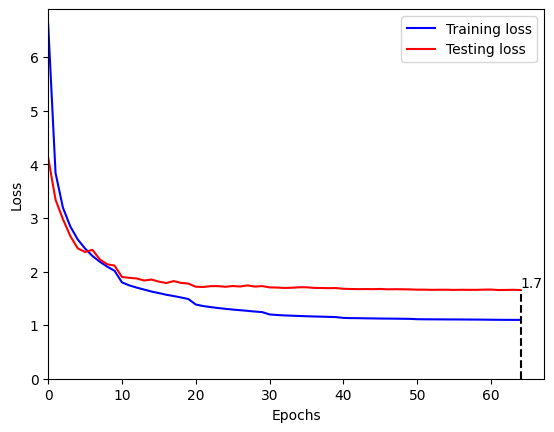

Traing epoch: 65   avg loss is: 1.0977831855505242
Testing epoch: 65   avg testing loss is: 1.6578123729885068
Testing on epoch: 65 has accuracy: top1: 88.13 top5: 93.54


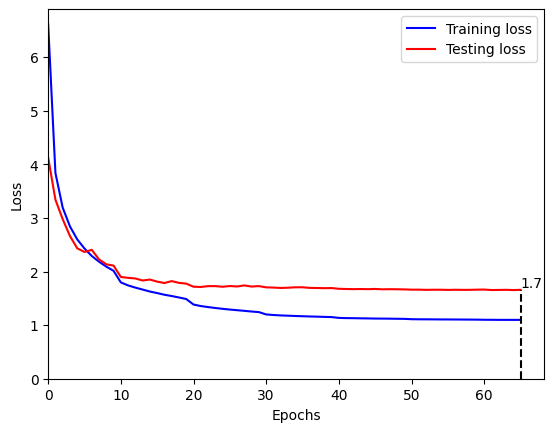

Traing epoch: 66   avg loss is: 1.0967299959548573
Testing epoch: 66   avg testing loss is: 1.6594788966910754
Testing on epoch: 66 has accuracy: top1: 88.09 top5: 93.56


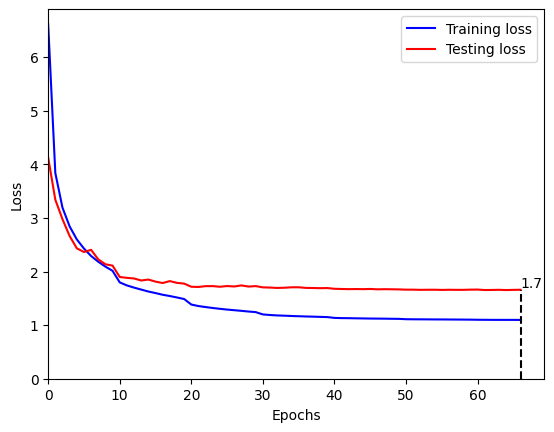

Traing epoch: 67   avg loss is: 1.0962755950001004
Testing epoch: 67   avg testing loss is: 1.6571774652795745
Testing on epoch: 67 has accuracy: top1: 88.07 top5: 93.55


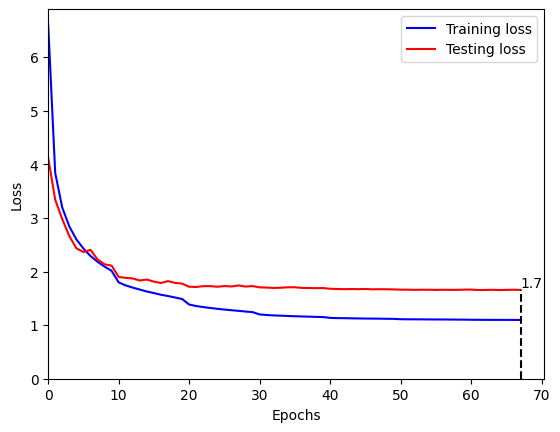

Traing epoch: 68   avg loss is: 1.0964158986414565
Testing epoch: 68   avg testing loss is: 1.659645902780039
Testing on epoch: 68 has accuracy: top1: 88.06 top5: 93.56


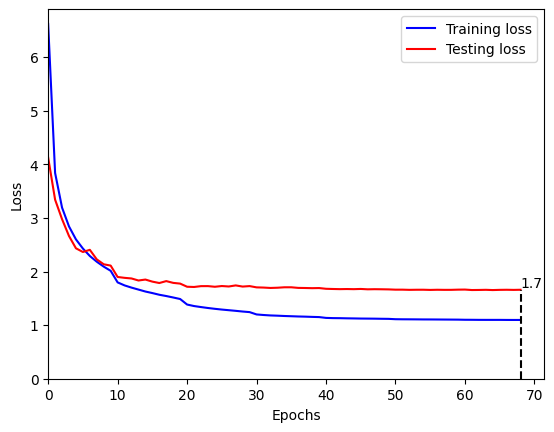

Traing epoch: 69   avg loss is: 1.0962320300529926
Testing epoch: 69   avg testing loss is: 1.655664931043247
Testing on epoch: 69 has accuracy: top1: 88.06 top5: 93.54


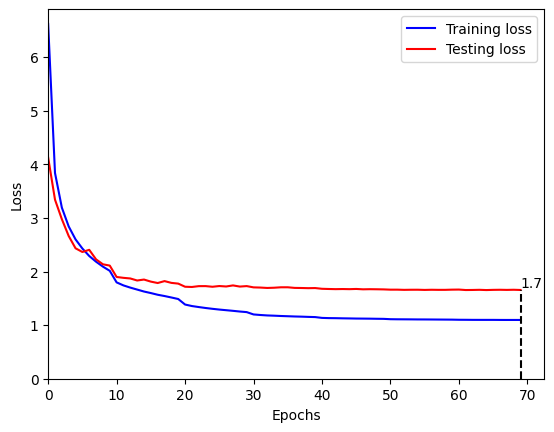

In [3]:
class DeepWriter_Train:
    def __init__(self,dataset='CERUG-EN',imgtype='png'):

        self.dataset = dataset
        self.folder = dataset
        #self.labelfolder = 'dataset/'

        if not os.path.exists(self.folder):
            if dataset == 'CERUG-EN':
                download_cerug(dataset)
            elif dataset == 'Firemaker':
                download_firemaker(dataset)
            else:
                print('****** Warning: the dataset %s does not existed!******'%dataset)
                print('Please go to the following website to check how to download the dataset:')
                print('https://www.ai.rug.nl/~sheng/writeridataset.html')
                print('*'*20)
                raise ValueError('Dataset: %s does not existed!'%dataset)

        self.labelfolder = self.folder
        self.train_folder = self.folder+'/train/'
        self.test_folder = self.folder+'/holdout_set/'

        self.imgtype=imgtype
        self.device = 'cuda'
        self.scale_size=(64,128)

        if self.device == 'cuda':
            torch.backends.cudnn.benchmark = True

        if self.dataset == 'CVL':
            self.imgtype = 'tif'

        self.model_dir = 'model'
        if not os.path.exists(self.model_dir):
            #raise ValueError('Model directory: %s does not existed'%self.model_dir)
            os.mkdir(self.model_dir)#raise ValueError('Model directory: %s does not existed'%self.model_dir)

        basedir = 'CTE_WriterIdentification_dataset_IAM_model'
        self.logfile= basedir + '.log'
        self.modelfile = basedir
        self.batch_size = 16

        train_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.train_folder,
                        imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = True)

        self.training_data_loader = DataLoader(dataset=train_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=True, drop_last=True)

        test_set = DatasetFromFolder(dataset=self.dataset,
        				labelfolder = self.labelfolder,
                        foldername=self.test_folder,imgtype=self.imgtype,
                        scale_size=self.scale_size,
                        is_training = False)

        self.testing_data_loader = DataLoader(dataset=test_set, num_workers=2,
                           batch_size=self.batch_size, shuffle=False)

        num_class = train_set.num_writer
        self.model = GrnnNet(1,num_classes=train_set.num_writer).to(self.device)

        #self.criterion = nn.CrossEntropyLoss()
        self.criterion = LabelSomCE()
        self.optimizer = optim.Adam(self.model.parameters(),lr=0.0001,weight_decay=1e-4)
        self.scheduler = lr_scheduler.StepLR(self.optimizer,step_size=10,gamma=0.5)


    def train(self,epoch):
        self.model.train()
        losstotal = []

        for iteration,batch in enumerate(self.training_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].type(torch.long).to(self.device)

            self.optimizer.zero_grad()

            logits = self.model(inputs)

            train_loss= self.criterion(logits,target)

            losstotal.append(train_loss.item())
            train_loss.backward()
            self.optimizer.step()

        with open(self.logfile,'a') as fp:
            fp.write('Training epoch %d avg loss is: %.6f\n'%(epoch,np.mean(losstotal)))
        print('Traing epoch:',epoch,'  avg loss is:',np.mean(losstotal))


        return np.mean(losstotal)


    def test(self,epoch,during_train=True):
        self.model.eval()
        losstotal = []

        if not during_train:
            self.load_model(epoch)

        top1 = 0
        top5 = 0
        ntotal=0

        for iteration,batch in enumerate(self.testing_data_loader,1):
            inputs = batch[0].to(self.device).float()
            target = batch[1].to(self.device).long()

            logits = self.model(inputs)

            test_loss = self.criterion(logits,target)

            losstotal.append(test_loss.item())

            res = self.accuracy(logits,target,topk=(1,5))
            top1 += res[0]
            top5 += res[1]

            ntotal += inputs.size(0)



        top1 /= float(ntotal)
        top5 /= float(ntotal)

        print('Testing epoch:',epoch,'  avg testing loss is:',np.mean(losstotal))
        print('Testing on epoch: %d has accuracy: top1: %.2f top5: %.2f'%(epoch,top1*100,top5*100))
        with open(self.logfile,'a') as fp:
            fp.write('Testing epoch %d accuracy is: top1: %.2f top5: %.2f\n'%(epoch,top1*100,top5*100))

        return np.mean(losstotal)



    def check_exists(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        return os.path.exists(model_out_path)

    def checkpoint(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        torch.save(self.model.state_dict(),model_out_path)


    def load_model(self,epoch):
        model_out_path = self.model_dir + '/' + self.modelfile + '-model_epoch_{}.pth'.format(epoch)
        self.model.load_state_dict(torch.load(model_out_path,map_location=self.device))
        print('Load model successful')
        
    
    def save_losses(self, epoch, training_loss, testing_loss, file_path):
        with open(file_path, 'a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([epoch, training_loss, testing_loss])

    def plot_losses(self, training_losses, testing_losses, csv_file_path="/kaggle/working/losses.csv"):
        indices = range(len(training_losses))
        plt.plot(indices, training_losses, 'b', label='Training loss')
        plt.plot(indices, testing_losses, 'r', label='Testing loss')
        #
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)

        last_epoch = indices[-1]
        last_test_loss = testing_losses[-1]
        plt.plot([last_epoch, last_epoch], [0, last_test_loss], 'k--')
        plt.text(last_epoch, last_test_loss, f'{last_test_loss:.1f}', color='k', va='bottom', ha='left')
        plt.savefig("/kaggle/working/loss_plot.svg", format="svg", dpi=300)
        
        #plt.title('Training and Validation Losses')

        plt.show()
        
        with open(csv_file_path, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['epoch', 'training_loss', 'testing_loss'])  
            for epoch, (train_loss, test_loss) in enumerate(zip(training_losses, testing_losses)):
                writer.writerow([epoch, train_loss, test_loss])
                

    def train_loops(self,start_epoch,num_epoch):
        #if self.check_exists(num_epoch): return
        if start_epoch > 0:
            self.load_model(start_epoch-1)

        training_losses = []
        testing_losses = []

        for epoch in range(start_epoch,num_epoch):
            train_loss = self.train(epoch)
            training_losses.append(train_loss)
            self.checkpoint(epoch)
            test_loss = self.test(epoch)
            testing_losses.append(test_loss)
            self.scheduler.step()
            self.plot_losses(training_losses, testing_losses)


    def accuracy(self,output,target,topk=(1,)):
        with torch.no_grad():
            maxk = max(topk)
            _,pred = output.topk(maxk,1,True,True)
            pred = pred.t()
            correct = pred.eq(target.view(1, -1).expand_as(pred))

            res = []
            for k in topk:
                correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
                res.append(correct_k.data.cpu().numpy())

        return res





if __name__ == '__main__':


    mod = DeepWriter_Train(dataset='/kaggle/input/iam-words-v2/IAM_words_segments')
    mod.train_loops(0,70)